In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colour import Color

from ete3 import Tree, TreeStyle, NodeStyle
from numpy.ma.core import arange


`#1f77b4, #ff7f0e, #2ca02c, #d62728, #9467bd, #8c564b, #e377c2, #7f7f7f, #bcbd22, and #17becf`

In [164]:
def load_data():
    data = np.loadtxt("/var/home/luka/proj/Papilonidae_dataset_v2/Papilionidae_aligned_new.txt", delimiter="\t").reshape((2240, 200))
    cats = pd.read_csv("/var/home/luka/proj/Papilonidae_dataset_v2/Papilonidae_metadata_new.txt", header=None)[0]

    tree = Tree("/var/home/luka/proj/Papilonidae_dataset_v2/papilionidae_tree.txt", format=1)
    order = tree.get_leaf_names()  # returns in-order leaves (same as pre-order when just looking at leaves)

    df = pd.DataFrame(data.reshape(2240, -1))
    df['category'] = pd.Categorical(cats, categories=cats.unique())
    means = df.groupby('category', observed=True).mean()
    df['order'] = pd.Categorical(df['category'], categories=order, ordered=True)
    means = means.reset_index()
    means['order'] = pd.Categorical(means['category'], categories=order, ordered=True)
    means = means.sort_values('order')

    x = means.drop(columns=['category', 'order']).values

    return x, order, tree

X,names,ptree = load_data()

In [165]:
import matplotlib.pyplot as plt
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf"
]

def plot_wings(x, sp=plt, cs=colors[:2], leg=None):
    marks = x.reshape(2,100)
    s = 50
    for i in range(2):
        n = [0,s][i]
        c = cs[i]
        xs = marks[0,n:s+n]
        ys = marks[1,n:s+n]
        if leg and not i:
            sp.plot(xs, ys,color=c,label=leg)
        else:
            sp.plot(xs, ys,color=c)
    sp.axis("equal")

    if leg:
        sp.legend()

def plot_points(marks, cols=4, titles=None):
    (n,_) = marks.shape
    if titles is None or len(titles) != n:
        titles = [str(i) for i in range(n)]
    (rows,rest) = np.divmod(n, cols)

    f = plt.figure(figsize=(rows*2, cols*12))
    for i in range(cols*rows):

        sp = plt.subplot(rows, cols, i + 1)
        plt.title(titles[i])
        plot_wings(marks[i],sp)


def compare_more_points(marksList, cols=4,titles=None,legs=(None,None)):
    (n,_) = marksList[0].shape
    s = len(marksList)

    #for var in [titles, legs]:
    if legs is None or len(legs) != s:
        print(legs,s)
        legs = [str(i) for i in range(s)]
    if titles is None or len(titles) != n: titles = [str(i) for i in range(n)]


    (rows,rest) = np.divmod(n, cols)

    f = plt.figure(figsize=(rows*2, cols*12))
    for i in range(cols*rows):

        sp = plt.subplot(rows, cols, i + 1)
        plt.title(titles[i])
        for j in range(s):
            plot_wings(x=marksList[j][i],sp=sp,cs=[colors[j]]*2,leg=legs[j])

Results of code below: data is Procrustes superimposed to remove translation and rotation, but not removing scale differences (RMSD differs).

# Traditional PCA

In [166]:

X_mean = np.mean(X, axis=0)
X_cent = X - X_mean[None,:]
# get eigenvectors and eigenvalues from covariance matrix
cov = np.cov(X_cent.T)
evals, evecs = np.linalg.eigh(cov)

k         Proportion of variance explained by the first k principal components
1         0.4725564132953195
2         0.7414733442543575
3         0.853011226974447
4         0.9001848103453935
5         0.9317659590506973
6         0.9466499156309288
7         0.9591728990563366
8         0.9677739356778489
9         0.9745761706155931
10        0.9796775488170285
11        0.9837313771812705
12        0.9865598811439666
13        0.9885733449069789
14        0.9904090454405177
15        0.9919231467167611
16        0.9931095116326686
17        0.9941897383143994
18        0.9949905947045757
19        0.995638527332862
20        0.9962623489981803
21        0.9967566763789024
22        0.9971757663475554
23        0.9975304573451141
24        0.9978811473701548
25        0.9981471040136618
26        0.998395316740678
27        0.9986249125333455
28        0.9988395068174925
29        0.9990206292088735
30        0.9991843826171327
31        0.9993245458534441
32        0.9994504451379

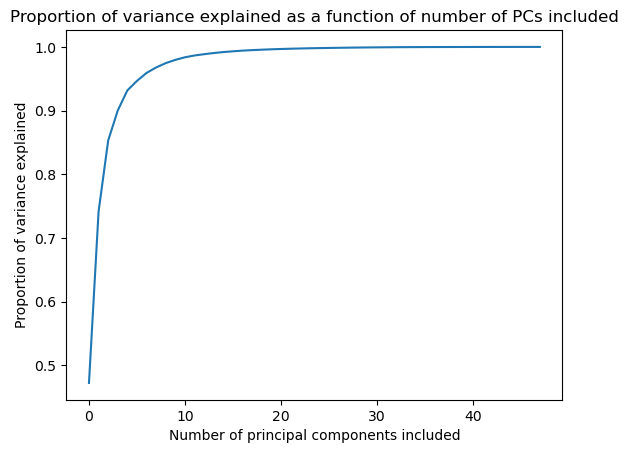

In [167]:
N,d = X.shape
# variance explained by first k components
vars = evals[::-1]/np.sum(evals)                # variance explained per component
cVars = np.cumsum(vars) # cumulative variance explained

plt.plot(cVars[:N])
plt.xlabel('Number of principal components included')
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained as a function of number of PCs included')

# Let's print out the proportion of variance explained by the first 10 PCs
print(f'{"k":<10}Proportion of variance explained by the first k principal components')
for i in range(N):
    print(f'{i+1:<10}{cVars[i]}')

In [168]:
def pca_recon(k=2):
    V_k = evecs[:, -k:]
    X_reduced = X_cent @ V_k
    X_reconstructed = X_reduced @ V_k.T + X_mean[None,:]
    return (X_reconstructed)

In [169]:
K=6
ks = [i for i in range(1,K+1)]
v = 3
w = 2*v + 1
s = 0.01
a = np.arange(-v,v+1)
print(a,len(a),w)

#t1 = pca_transform(k=1,w=1.)
#t2 = pca_transform(k=1,w=2.)
#print(t1-X_mean)

[-3 -2 -1  0  1  2  3] 7 7


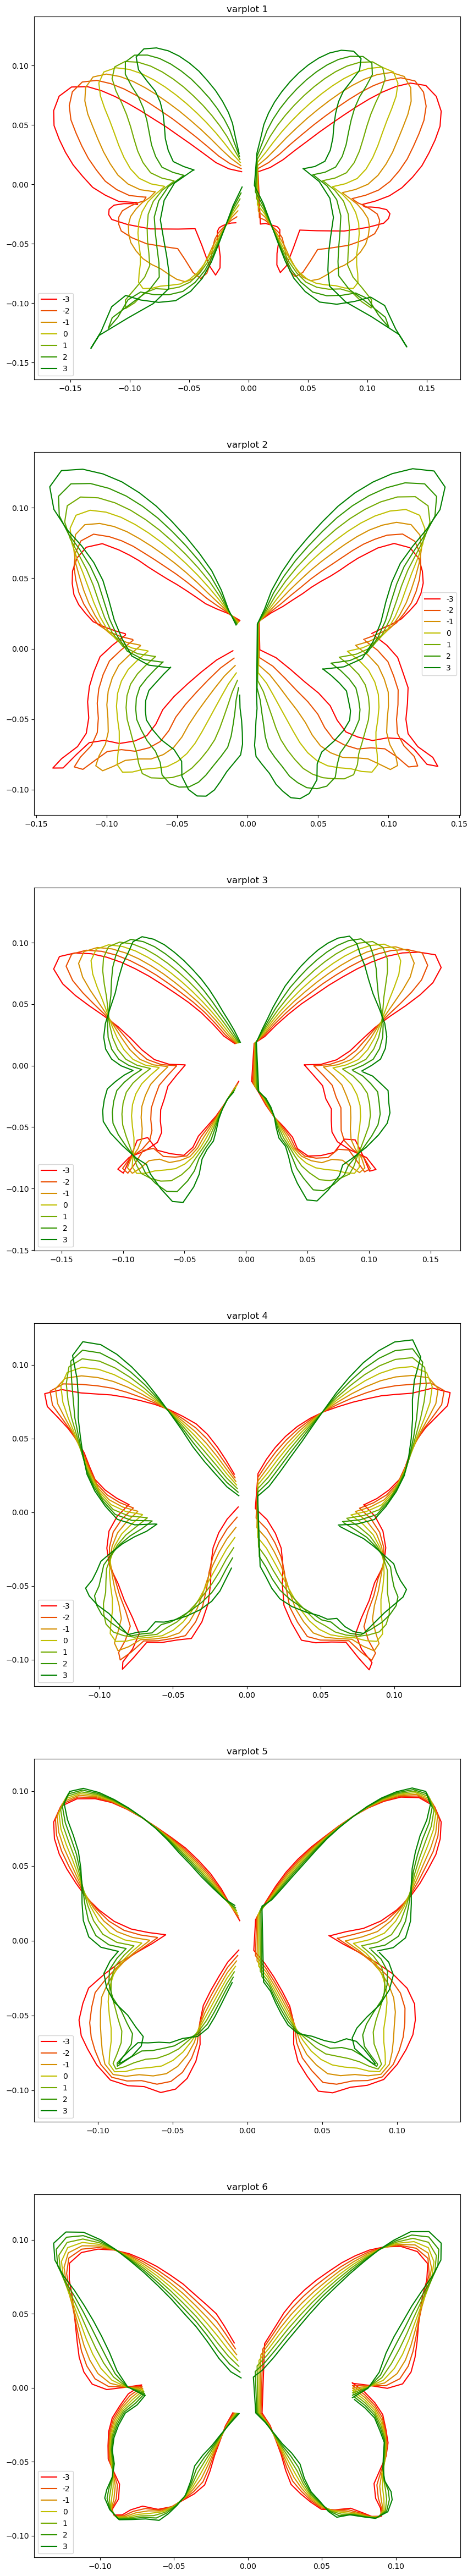

In [170]:
gradient = list(Color("red").range_to(Color("green"), w))
grad = [c.get_hex() for c in gradient]
e1 = evals[-1]

plt.figure(figsize=(10, 10*K))

for k in range(1,w):
    sp = plt.subplot(K,1,k)
    evec = evecs[:, -k]
    lam = evals[-k]
    #d = (e1 - lam)*100
    std = (lam ** -0.3) # + d
    #print(f'{lam:>9.9f}{std:19.9f}{d:19.9f}')
    ek_space = std * (evec @ cov)
    devs = std * a
    x = X_mean + devs[:,None] * ek_space
    for i in range(w):
        plt.title(f'varplot {k}')
        plot_wings(x=(x[i]),sp=sp,cs=[grad[i]]*2,leg=f'{a[i]}')
plt.show()


# Phylogenetic PCA

In [171]:
(N,d)   = X.shape
D       = np.zeros((N*d,d))

for i in range(N*d):
    for j in range(d):
        if (j-1)*N < i >= j*N:
            D[i,j] = 1.


In [172]:

def ecov(a,b):
    na,nb = names[a],names[b]
    if a == b:
        mrca = ptree.search_nodes(name=names[a])[0]
    else:
        mrca = ptree.get_common_ancestor(na,nb)

    dist = ptree.get_distance(mrca)
    print(f'{na:>30}\t{nb:>30}\t{mrca.name:>30}\t{dist}\n')

    return dist

In [173]:
evoCov = np.empty((N,N))

for i in range(N):
    for j in range(N):
        evoCov[i,j] = ecov(i,j)

           Baronia_brevicornis	           Baronia_brevicornis	           Baronia_brevicornis	0.1711

           Baronia_brevicornis	         Iphiclides_podalirius	                        QS1803	0.0

           Baronia_brevicornis	               Graphium_evemon	                        QS1803	0.0

           Baronia_brevicornis	             Graphium_sarpedon	                        QS1803	0.0

           Baronia_brevicornis	            Graphium_agamemnon	                        QS1803	0.0

           Baronia_brevicornis	       Protographium_marcellus	                        QS1803	0.0

           Baronia_brevicornis	           Hypermnestra_helios	                        QS1803	0.0

           Baronia_brevicornis	            Parnassius_orleans	                        QS1803	0.0

           Baronia_brevicornis	           Parnassius_honrathi	                        QS1803	0.0

           Baronia_brevicornis	              Archon_apollinus	                        QS1803	0.0

           Baroni

![MLE](images/3-4.png)

In [174]:

v1 = np.ones(N)
evoCov_inv = np.linalg.inv(evoCov)
tmp = v1.T @ evoCov_inv
mle_r = ((tmp @ v1) **-1) * (tmp @ X)
assert mle_r.shape==(d,)

tmp = X - mle_r.T
mle_R = (((N - 1) ** -1) * tmp.T) @ evoCov_inv @ tmp
assert mle_R.shape==(d,d)

pcent_X = X - mle_r[None,:]

evoEvals, evoEvecs = np.linalg.eigh(mle_R)

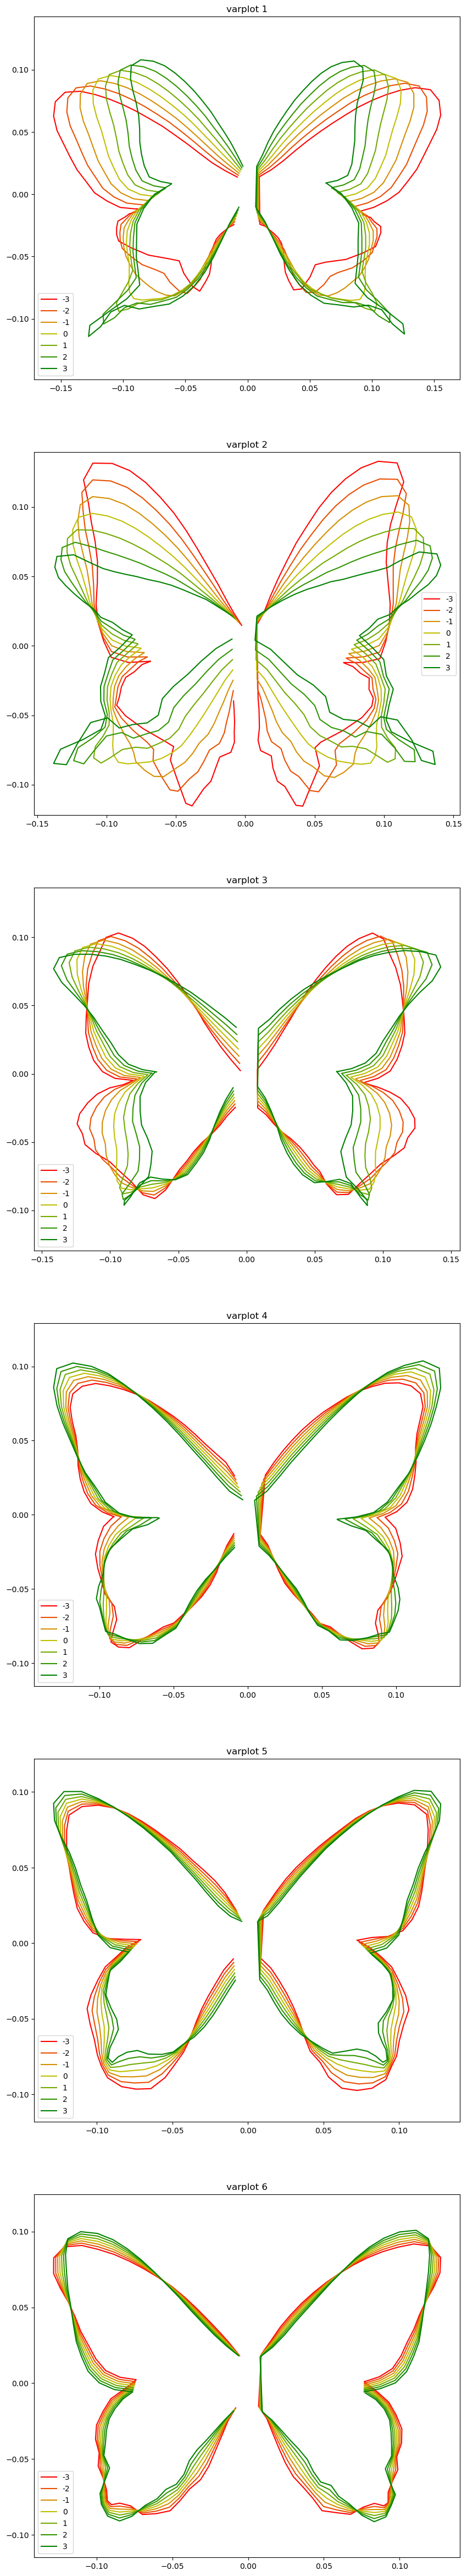

In [175]:
gradient = list(Color("red").range_to(Color("green"), w))
grad = [c.get_hex() for c in gradient]
e1 = evoEvals[-1]

plt.figure(figsize=(10, 10*K))

for k in range(1,w):
    sp = plt.subplot(K,1,k)
    evec = evoEvecs[:, -k]
    lam = evoEvals[-k]
    d = (e1 - lam)*20
    std = (lam ** -0.03) + d
    #print(f'{lam:>9.9f}{std:19.9f}{d:19.9f}')
    ek_space = std * (evec @ mle_R)
    devs = std * a
    x = mle_r + devs[:,None] * ek_space
    for i in range(w):
        plt.title(f'varplot {k}')
        plot_wings(x=(x[i]),sp=sp,cs=[grad[i]]*2,leg=f'{a[i]}')
plt.show()


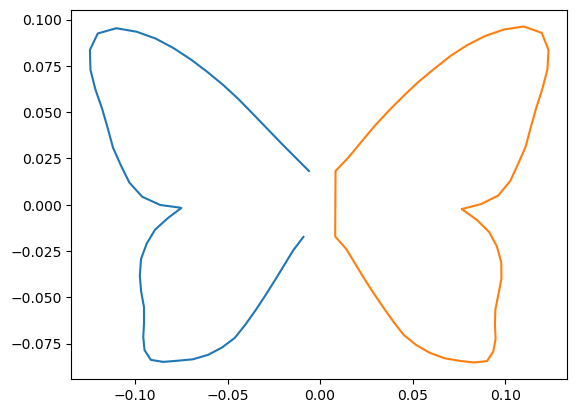

In [176]:
plot_wings(mle_r)

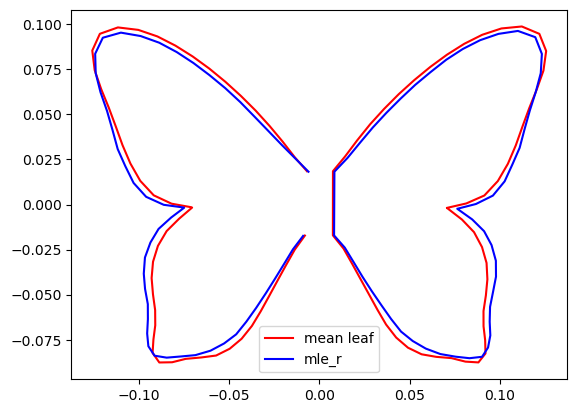

In [177]:
plot_wings(x=(X_mean),sp=plt,cs=['red']*2,leg='mean leaf')
plot_wings(x=(mle_r),sp=plt,cs=['blue']*2,leg='mle_r')



![MLE2](images/3-4-ex.png)

Proportion of variance exlained by first k PCs, using PCA and pPCA
k    PCA       pPCA      
1    0.4726    0.5825
2    0.7415    0.7624
3    0.8530    0.8388
4    0.9002    0.8803
5    0.9318    0.9160
6    0.9466    0.9350
7    0.9592    0.9508
8    0.9678    0.9621
9    0.9746    0.9696
10   0.9797    0.9750
11   0.9837    0.9796
12   0.9866    0.9835
13   0.9886    0.9860
14   0.9904    0.9882
15   0.9919    0.9901
16   0.9931    0.9917
17   0.9942    0.9929
18   0.9950    0.9939
19   0.9956    0.9947
20   0.9963    0.9953
21   0.9968    0.9959
22   0.9972    0.9965
23   0.9975    0.9970
24   0.9979    0.9974
25   0.9981    0.9978
26   0.9984    0.9981
27   0.9986    0.9984
28   0.9988    0.9986
29   0.9990    0.9988
30   0.9992    0.9990
31   0.9993    0.9992
32   0.9995    0.9993
33   0.9996    0.9994
34   0.9996    0.9995
35   0.9997    0.9996
36   0.9998    0.9997
37   0.9998    0.9998
38   0.9998    0.9998
39   0.9999    0.9999
40   0.9999    0.9999
41   0.9999    0.9999
42   

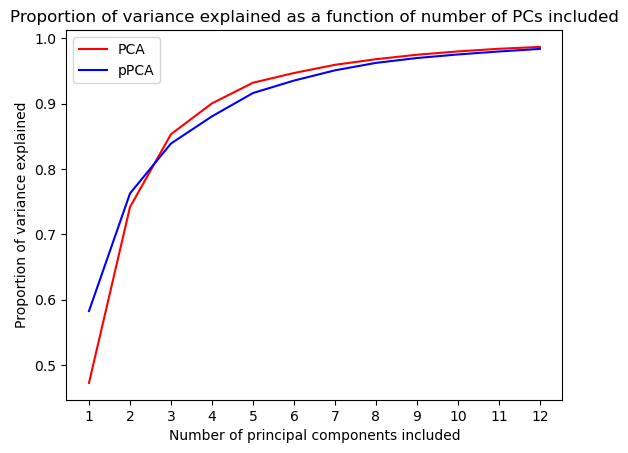

In [178]:
#print(Cov.shape,evoCov.shape) fixed now

evoEvals, evoEvecs = np.linalg.eigh(mle_R)

# variance explained by first k components
vars = evoEvals[::-1]/np.sum(evoEvals)                # variance explained per component
evoCvars = np.cumsum(vars) # cumulative variance explained

maxk = 12
xs = np.arange(1, maxk+1)

plt.plot(xs,cVars[:maxk],color='red',label="PCA")
plt.plot(xs,evoCvars[:maxk],color='blue',label="pPCA")
plt.xticks(xs)
plt.legend()

plt.xlabel('Number of principal components included')
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained as a function of number of PCs included')


# Let's print out the proportion of variance explained by the first 10 PCs
print("Proportion of variance exlained by first k PCs, using PCA and pPCA")
print(f'{"k":5}{"PCA":10}{"pPCA":10}')
for i in range(N):
    print(f'{i+1:<5}{cVars[i]:6.4f}{evoCvars[i]:10.4f}')


In [179]:
def ppca_recon(k=2):
    V_k = evoEvecs[:, -k:]
    #print(X_cent.shape,V_k.shape)
    X_reduced = pcent_X @ V_k
    #print(X_reduced.shape)
    tmp = (X_reduced @ V_k.T)
    X_reconstructed = tmp + mle_r[None,:]
    return (X_reconstructed)

In [180]:
X.shape

(48, 200)

In [181]:
Adifs = np.zeros
def reconCompare(k=8):

    # reconstruct
    reconA = pca_recon(k)
    reconB = ppca_recon(k)

    print(f'Reconstruction with {k} principal components')
    compare_more_points(marksList=[reconA,reconB,X],cols=4,titles=names,legs=["PCA","pPCA","original"])

In [182]:


def geoDist(x_recon):

    dx = X[:,:100] - x_recon[:,:100]
    dy = X[:,100:] - x_recon[:,100:]

    dist = np.sqrt(np.square(dx) + np.square(dy))
    return np.sum(dist)

Reconstruction comparison of geometric distances
k     PCA             pPCA            % points larger 
0     24.97751155     29.43912489     17.86252137 %
1     17.78841882     22.77216519     28.01680364 %
2     13.77079216     16.25402830     18.03263103 %
3     11.37866656     13.77873005     21.09266038 %
4      9.32401894     12.48909061     33.94535864 %
5      8.21233408     11.69350774     42.38957687 %
6      7.18766356      9.85744924     37.14399908 %
7      6.34029383      8.72540816     37.61835654 %
8      5.53492334      7.93799158     43.41646845 %
9      4.87452474      7.51266140     54.12089986 %
10      4.39803440      7.00857796     59.35705167 %
11      3.98400424      6.24780977     56.82236748 %
12      3.70702490      5.98565499     61.46789268 %
13      3.39167198      5.69711833     67.97374173 %
14      3.15755152      5.12651760     62.35736981 %
15      2.91053621      4.66375357     60.23691995 %
16      2.66624622      4.26775269     60.06596316 %
17   

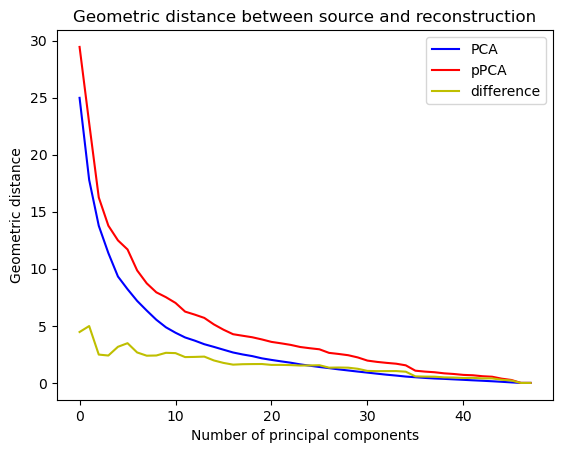

In [188]:

print("Reconstruction comparison of geometric distances")
print(f'{"k":<6}{"PCA":<16}{"pPCA":<16}{"% points larger":<16}')
A = np.empty(N)
B = np.empty(N)
for i in range(N):
    k = i+1
    reconA = pca_recon(k)
    reconB = ppca_recon(k)
    difA = geoDist(reconA)
    difB = geoDist(reconB)
    A[i] = difA
    B[i] = difB
    print(f'{i}{difA:>16.8f}{difB:>16.8f}{((difB/difA)-1)*100:>16.8f} %')

C = B - A
plt.title('Geometric distance between source and reconstruction')
plt.plot(A,'b-',label='PCA')
plt.plot(B,'r-',label='pPCA')
plt.plot(C,'y-',label='difference')
plt.xlabel('Number of principal components')
plt.ylabel('Geometric distance')
plt.legend()
plt.show()

Reconstruction with 2 principal components


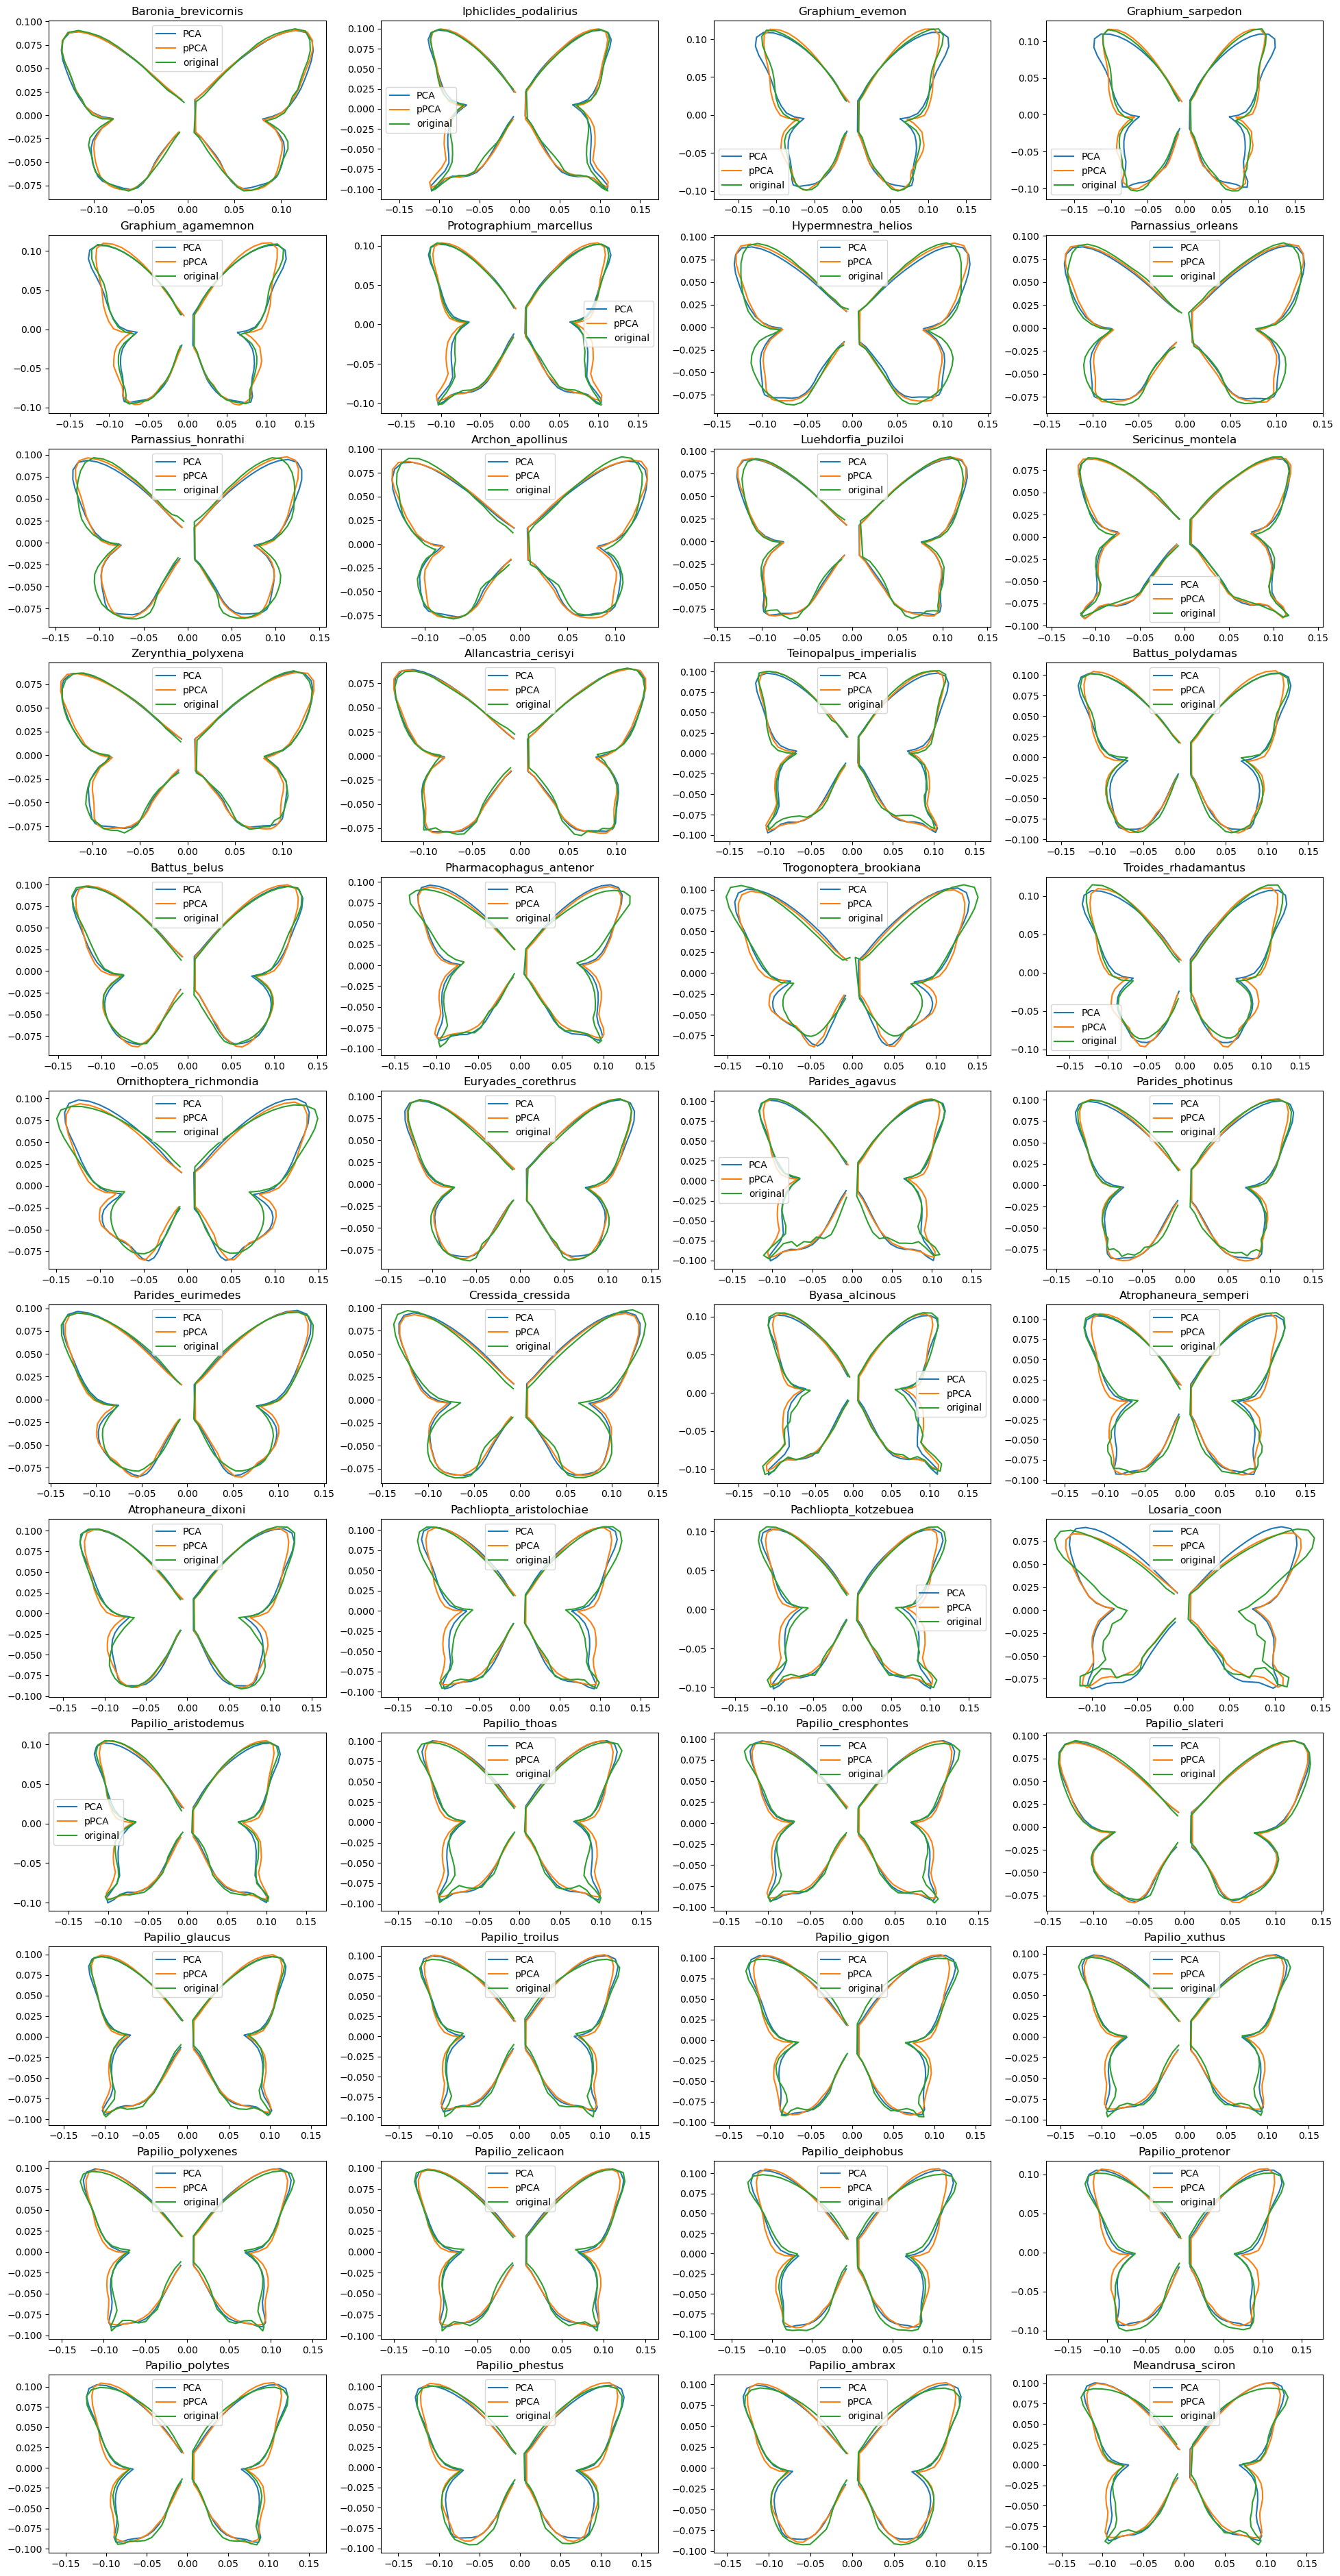

In [184]:
reconCompare(2)

Reconstruction with 8 principal components


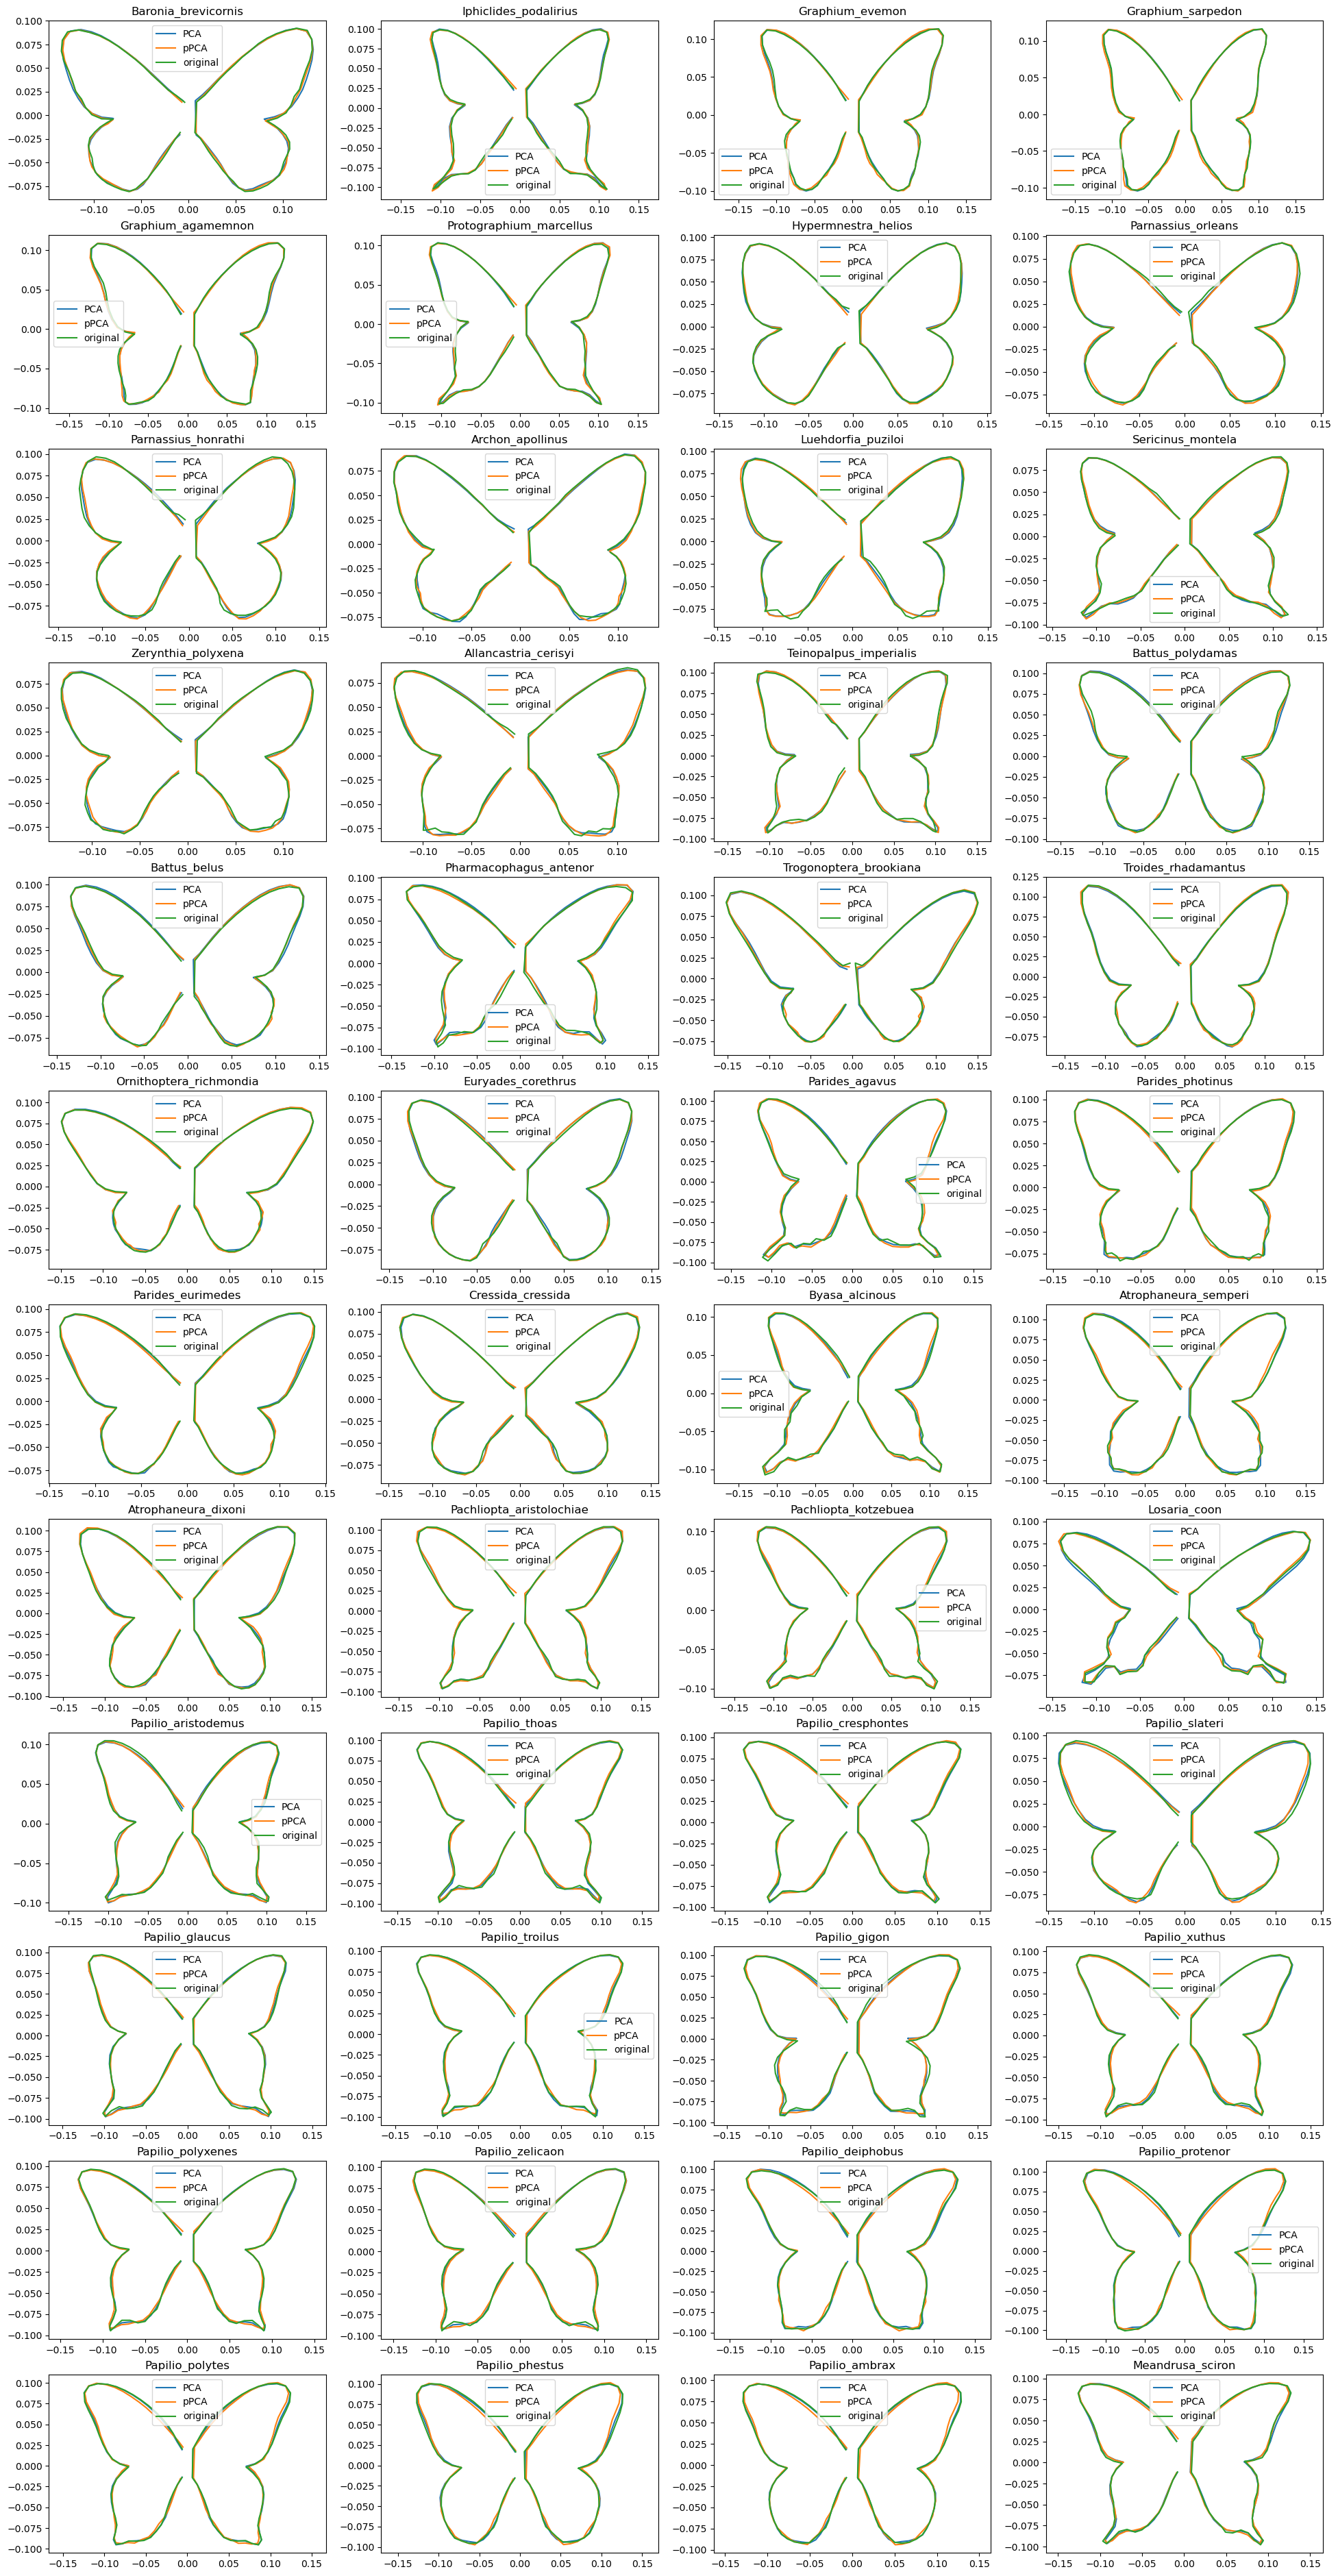

In [185]:
reconCompare(8)